In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [8]:
tempdf = pd.read_csv('insurance_reg.csv')

In [18]:
tempdf.head()

,Unnamed: 0,age,bmi,children,charges,sex_code,smoker_code,region_code
0,0,19,27.900,0,16884.92400,0,1,0
1,1,18,33.770,1,1725.55230,1,0,3
2,2,28,33.000,3,4449.46200,1,0,3
3,3,33,22.705,0,21984.47061,1,0,1
4,4,32,28.880,0,3866.85520,1,0,1


In [19]:
insdf =tempdf[['age','bmi','children','charges','sex_code','smoker_code','region_code']]

In [20]:
insdf.head()

,age,bmi,children,charges,sex_code,smoker_code,region_code
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,3
2,28,33.000,3,4449.46200,1,0,3
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


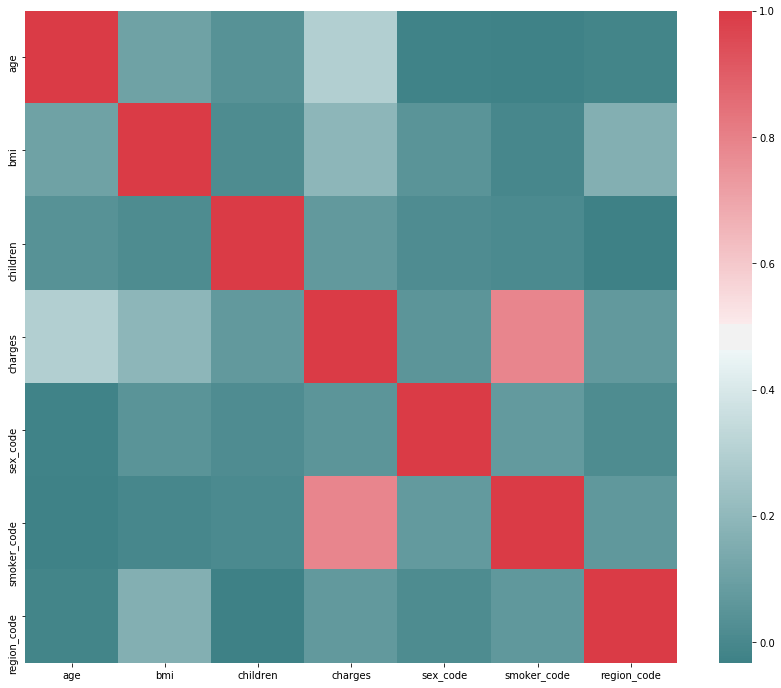

In [25]:
#corelation of data 
fi, axes = plt.subplots(figsize=(15, 12))
corr = insdf.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axes)

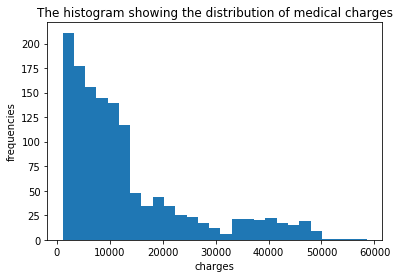

In [23]:
plt.hist(insdf.charges, bins='auto')  # arguments are passed to np.histogram
plt.title("The histogram showing the distribution of medical charges")
plt.xlabel('charges')
plt.ylabel('frequencies')
plt.show()

In [29]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

hist_pic = figure(title="Distribution of charges",tools="save", background_fill_color="#f7fbff")
hist, edges = np.histogram(insdf.charges)
hist_pic.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="#084594", line_color="#033649")
hist_pic.xaxis.axis_label = 'charges'
hist_pic.yaxis.axis_label = 'frequencies'
show(hist_pic)

Loading BokehJS ...

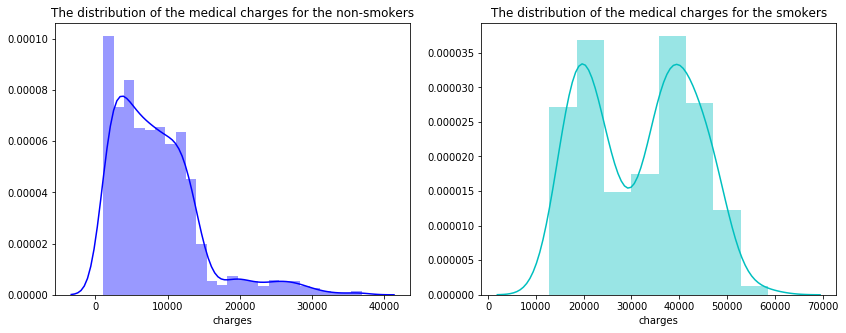

In [28]:
fi= plt.figure(figsize=(14,5))

axes=fi.add_subplot(121)
axes.set_title('The distribution of the medical charges for the non-smokers')
sb.distplot(insdf[(insdf.smoker_code == 0)]['charges'],color='b',ax=axes)

axes=fi.add_subplot(122)
axes.set_title('The distribution of the medical charges for the smokers')
sb.distplot(insdf[(insdf.smoker_code == 1)]['charges'],color='c',ax=axes)


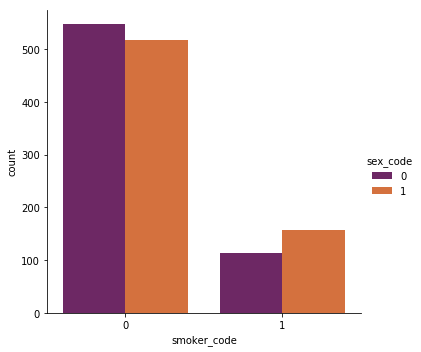

In [61]:
sb.catplot(x="smoker_code", kind="count",hue = 'sex_code', palette="inferno", data=insdf)

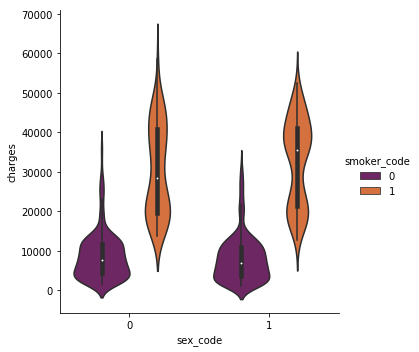

In [31]:
sb.catplot(x="sex_code", y="charges", hue="smoker_code", kind="violin", palette = 'inferno', data=insdf)

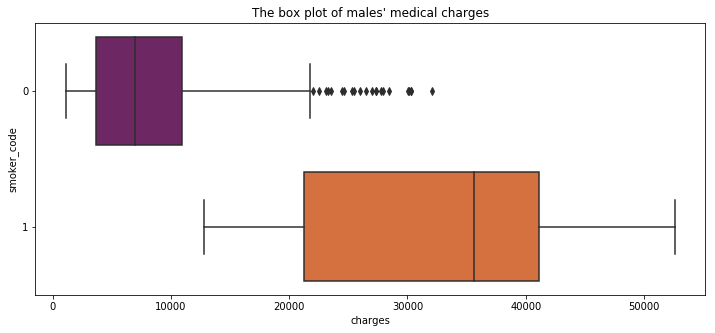

In [32]:
plt.figure(figsize=(12,5))
plt.title("The box plot of males' medical charges")
sb.boxplot(y="smoker_code", x="charges", data = insdf[(insdf.sex_code == 1)] 
            ,orient="h", palette = 'inferno')

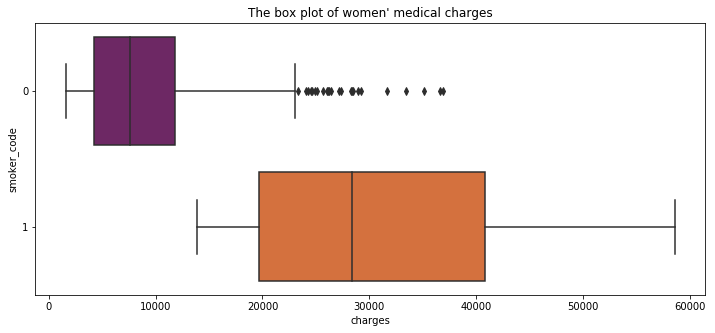

In [34]:
plt.figure(figsize=(12,5))
plt.title("The box plot of women' medical charges")
sb.boxplot(y="smoker_code", x="charges", data = insdf[(insdf.sex_code == 0)] 
            ,orient="h", palette = 'inferno')

<Figure size 1008x360 with 0 Axes>

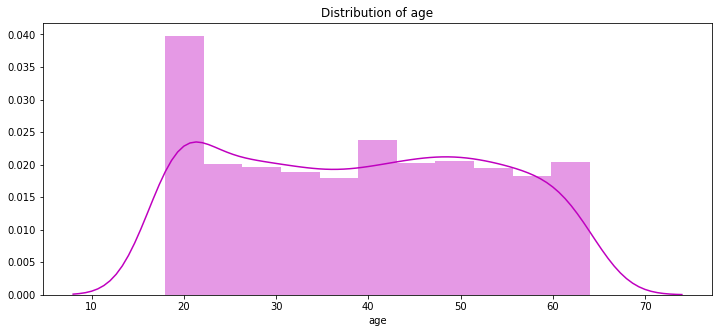

In [54]:
fi= plt.figure(figsize=(14,5))
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
axes = sb.distplot(insdf["age"], color = 'm')

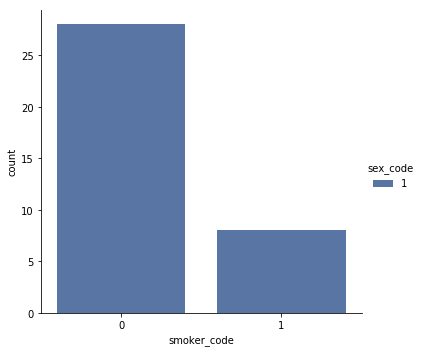

In [73]:
sb.catplot(x="smoker_code", kind="count",hue = 'sex_code', palette="deep", data=insdf[(insdf.age == 18) & (insdf.sex_code==1)] )

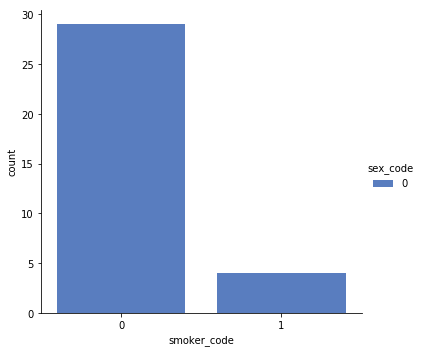

In [74]:
sb.catplot(x="smoker_code", kind="count",hue = 'sex_code', palette="muted", data=insdf[(insdf.age == 18) 
                                                                                         & (insdf.sex_code==0)] )

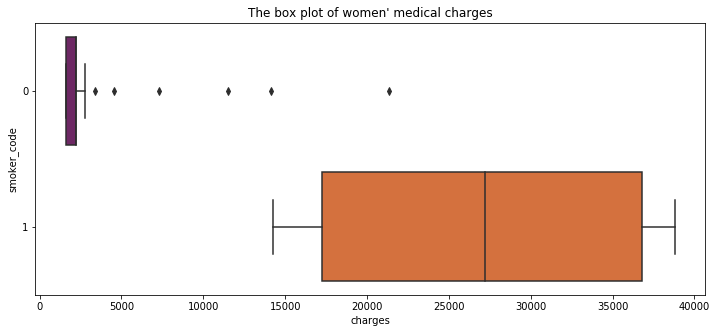

In [76]:
plt.figure(figsize=(12,5))
plt.title("The box plot of women' medical charges")
sb.boxplot(y="smoker_code", x="charges", data = insdf[(insdf.sex_code == 0) & (insdf.age==18)] 
            ,orient="h", palette = 'inferno')

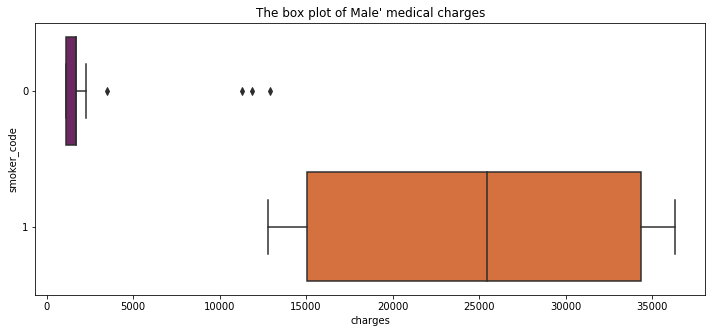

In [77]:
plt.figure(figsize=(12,5))
plt.title("The box plot of Male' medical charges")
sb.boxplot(y="smoker_code", x="charges", data = insdf[(insdf.sex_code == 1) & (insdf.age==18)] 
            ,orient="h", palette = 'inferno')

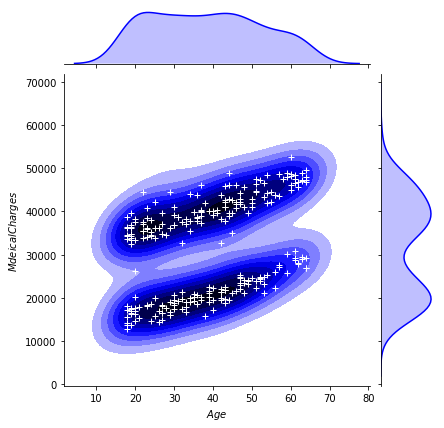

In [78]:
gh = sb.jointplot(x="age", y="charges", data = insdf[(insdf.smoker_code == 1)],kind="kde", color="b")
gh.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
gh.ax_joint.collections[0].set_alpha(0)
gh.set_axis_labels("$Age$", "$Mdeical Charges$")

Text(0.5,1,'Smokers and non-smokers (smoker_code 1 ==> smoker)')

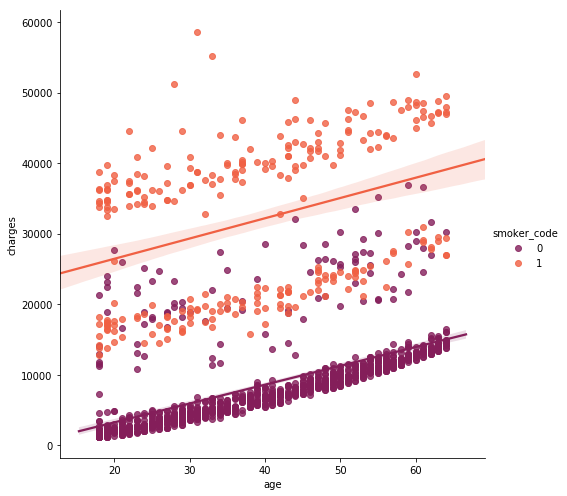

In [84]:
sb.lmplot(x="age", y="charges", hue="smoker_code", data=insdf, palette = 'rocket', size = 7)
axes.set_title('Smokers and non-smokers (smoker_code 1 ==> smoker)')

Text(0.5,1,'Smokers and non-smokers (smoker_code 1 ==> smoker)')

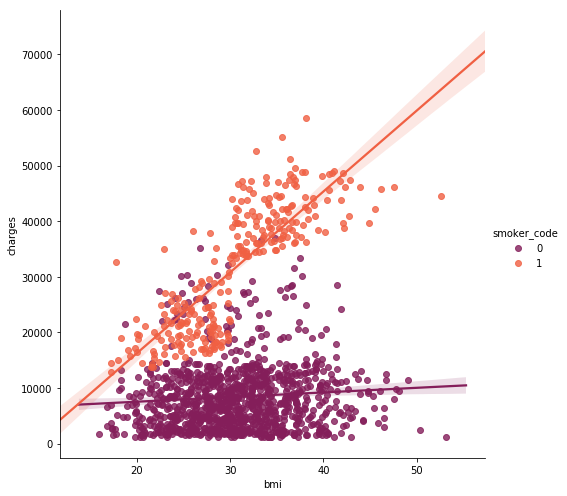

In [86]:
sb.lmplot(x="bmi", y="charges", hue="smoker_code", data=insdf, palette = 'rocket', size = 7)
axes.set_title('Smokers and non-smokers (smoker_code 1 ==> smoker)')

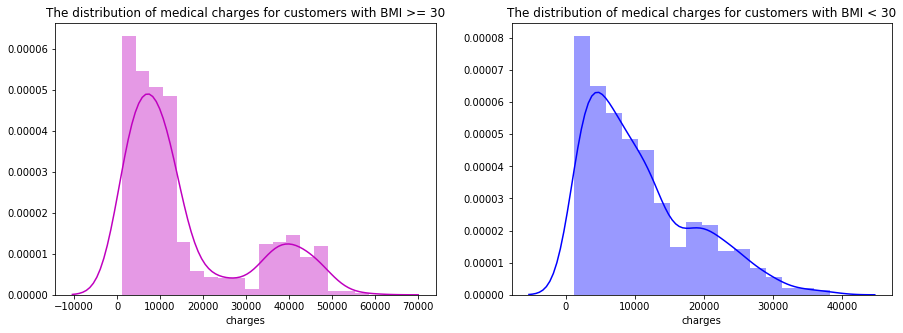

In [87]:
fi= plt.figure(figsize=(15,5))

axes=fi.add_subplot(121)
axes.set_title('The distribution of medical charges for customers with BMI >= 30')
sb.distplot(insdf[(insdf.bmi >= 30)]['charges'], color = 'm',ax=axes)

axes=fi.add_subplot(122)
axes.set_title('The distribution of medical charges for customers with BMI < 30')
sb.distplot(insdf[(insdf.bmi < 30)]['charges'], color = 'b',ax=axes)

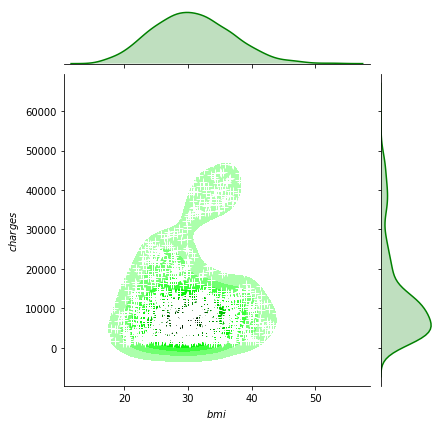

In [93]:
gh = sb.jointplot(x="bmi", y="charges", data = insdf,kind="kde", color="g")
gh.plot_joint(plt.scatter, c="w", s=50, linewidth=1, marker="+")
gh.ax_joint.collections[0].set_alpha(0)
gh.set_axis_labels("$bmi$", "$charges$")

Text(0.5,1,'The scatter plot of medical charges vs bmi')

<Figure size 720x432 with 0 Axes>

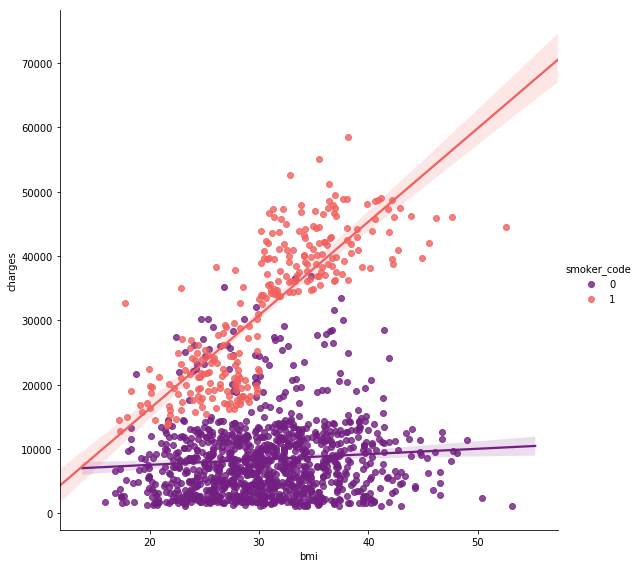

In [89]:
plt.figure(figsize=(10,6))
sb.lmplot(x="bmi", y="charges", hue="smoker_code", data=insdf, palette = 'magma', size = 8)
axes.set_title("The scatter plot of medical charges vs bmi")

In [95]:
insdf.head()

,age,bmi,children,charges,sex_code,smoker_code,region_code
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,3
2,28,33.000,3,4449.46200,1,0,3
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


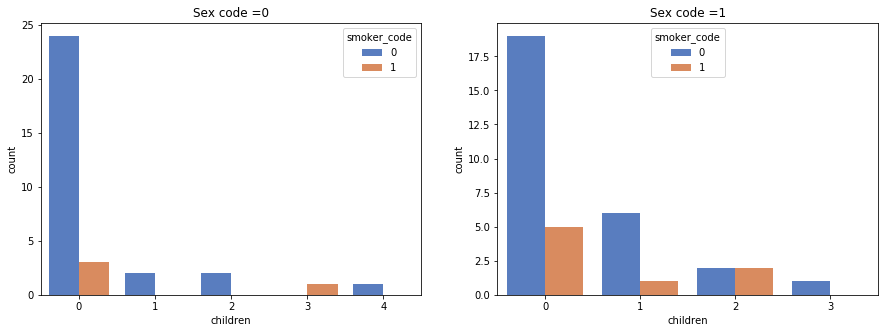

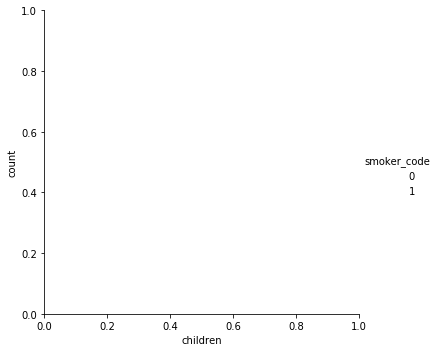

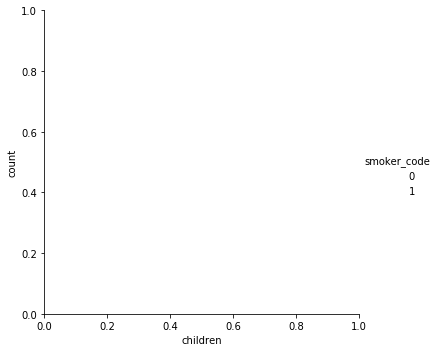

In [111]:

fi= plt.figure(figsize=(15,5))

axes=fi.add_subplot(121)
axes.set_title('Sex code =0')
sb.catplot(x="children", kind="count",hue = 'smoker_code', palette="muted", data=insdf[(insdf.age == 18)                                                                                
                                                                                       & (insdf.sex_code==0)],ax=axes)
axes=fi.add_subplot(122)
axes.set_title('Sex code =1')
sb.catplot(x="children", kind="count",hue = 'smoker_code', palette="muted", data=insdf[(insdf.age == 18) 
                                                                                         & (insdf.sex_code==1)],ax=axes)